In [26]:
# !pip install torch torchvision matplotlib pillow

Resize = (551, 406), Original = (1103, 812)


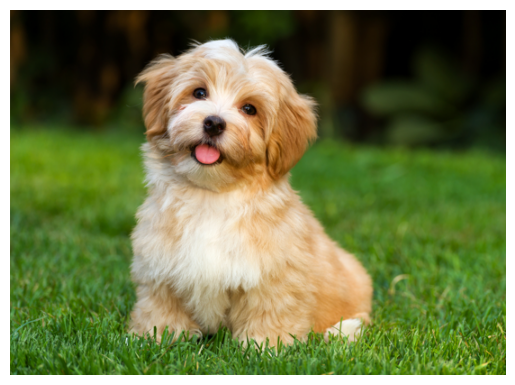

In [18]:
import matplotlib.pyplot as plt
from PIL import Image

img_path = 'dog.jpg'
img = Image.open(img_path)
new_size = (img.size[0] // 2, img.size[1] // 2)
resized_img = img.resize(new_size)

print(f'Resize = {resized_img.size}, Original = {img.size}')
plt.imshow(resized_img)
plt.axis('off')
plt.show()

1/1 [==============================] - 1s 1s/step
Predicted: [('n02096437', 'Dandie_Dinmont', 0.6521673)]


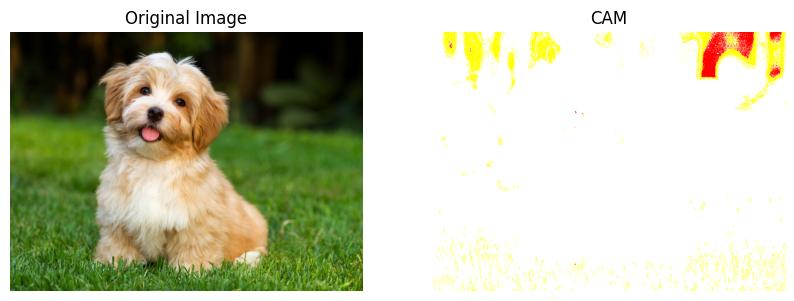

In [35]:
# Установим необходимые библиотеки
# !pip install tensorflow matplotlib opencv-python

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Загрузим предобученную модель VGG16
model = VGG16(weights='imagenet')

# Загрузим изображение
img_path = 'dog.jpg'  # Укажите путь к вашему изображению
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Получим предсказания модели
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=1)[0])

# Функция для создания CAM
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Создадим CAM
last_conv_layer_name = 'block5_conv3'
heatmap = make_gradcam_heatmap(x, model, last_conv_layer_name)

# Визуализируем изображение и CAM
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.01 + img

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title('CAM')
plt.axis('off')

plt.show()

1/1 [==============================] - 1s 670ms/step
Predicted: [('n02883205', 'bow_tie', 0.063376725)]


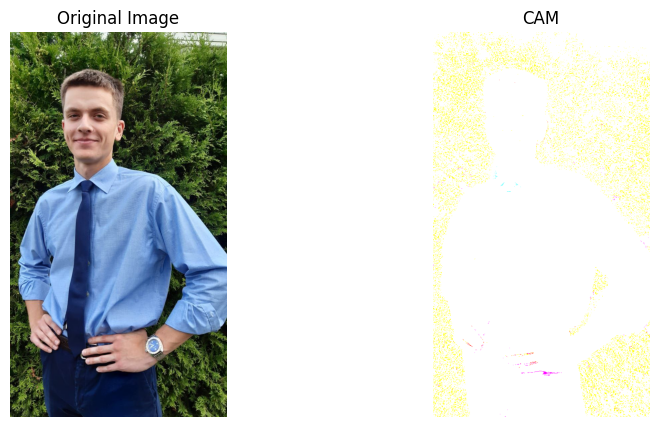

In [36]:
# Установим необходимые библиотеки
# !pip install tensorflow matplotlib opencv-python

import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions
from tensorflow.keras.models import Model
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Загрузим предобученную модель VGG16
model = VGG16(weights='imagenet')

# Загрузим изображение
img_path = 'я.jpg'  # Укажите путь к вашему изображению
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

# Получим предсказания модели
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=1)[0])

# Функция для создания CAM
def make_gradcam_heatmap(img_array, model, last_conv_layer_name, pred_index=None):
    grad_model = Model([model.inputs], [model.get_layer(last_conv_layer_name).output, model.output])

    with tf.GradientTape() as tape:
        last_conv_layer_output, preds = grad_model(img_array)
        if pred_index is None:
            pred_index = tf.argmax(preds[0])
        class_channel = preds[:, pred_index]

    grads = tape.gradient(class_channel, last_conv_layer_output)
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    last_conv_layer_output = last_conv_layer_output[0]
    heatmap = last_conv_layer_output @ pooled_grads[..., tf.newaxis]
    heatmap = tf.squeeze(heatmap)
    heatmap = tf.maximum(heatmap, 0) / tf.math.reduce_max(heatmap)
    return heatmap.numpy()

# Создадим CAM
last_conv_layer_name = 'block5_conv3'
heatmap = make_gradcam_heatmap(x, model, last_conv_layer_name)

# Визуализируем изображение и CAM
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.01 + img

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(superimposed_img)
plt.title('CAM')
plt.axis('off')

plt.show()